In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("final_data.csv")
df.head()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,0.11840,0.27760,0.3001,0.2419,0.07871,1.0950,0.9053,...,0.04904,0.05373,0.01587,0.03003,0.006193,0.1622,0.6656,0.7119,0.4601,0.11890
1,1,20.57,17.77,0.08474,0.07864,0.0869,0.1812,0.05667,0.5435,0.7339,...,0.01308,0.01860,0.01340,0.01389,0.003532,0.1238,0.1866,0.2416,0.2750,0.08902
2,1,19.69,21.25,0.10960,0.15990,0.1974,0.2069,0.05999,0.7456,0.7869,...,0.04006,0.03832,0.02058,0.02250,0.004571,0.1444,0.4245,0.4504,0.3613,0.08758
3,1,11.42,20.38,0.14250,0.28390,0.2414,0.2597,0.09744,0.4956,1.1560,...,0.07458,0.05661,0.01867,0.05963,0.009208,0.2098,0.8663,0.6869,0.6638,0.17300
4,1,20.29,14.34,0.10030,0.13280,0.1980,0.1809,0.05883,0.7572,0.7813,...,0.02461,0.05688,0.01885,0.01756,0.005115,0.1374,0.2050,0.4000,0.2364,0.07678


## Data Splitting
Split dataset into **training** and **testing** sets to evaluate model performance.

In [4]:
from sklearn.preprocessing import RobustScaler

# Separate features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Apply RobustScaler to handle outliers effectively
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame with the same column names
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Add the target column back
df_scaled['diagnosis'] = y.values

df_scaled.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,...,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,1.132353,-1.502664,1.190174,2.824832,2.358711,1.855030,2.039192,3.126978,-0.316669,0.006382,...,1.032641,0.698529,1.358173,1.301299,1.051020,2.364252,1.807750,2.635556,1.884578,1
1,1.764706,-0.190053,-0.587956,-0.213653,0.250742,0.059172,-0.578385,0.889655,-0.584440,-0.387974,...,-0.270401,0.349265,-0.581731,0.149351,-0.255102,-0.131839,0.055514,-0.106667,0.435500,1
2,1.549020,0.428064,0.725304,1.027337,1.343287,0.819527,-0.184086,1.709533,-0.501640,-0.077259,...,0.461053,1.364536,0.453125,0.599134,0.445578,1.107869,0.833458,1.171852,0.365664,1
3,-0.477941,0.273535,2.463286,2.921045,1.778327,2.381657,4.263658,0.695335,0.074988,0.917031,...,1.139466,1.094457,4.915865,2.606494,2.670068,3.410109,1.714605,5.653333,4.508244,1
4,1.696078,-0.799290,0.234020,0.613470,1.349219,0.050296,-0.321853,1.756592,-0.510389,1.716493,...,1.149481,1.119910,-0.140625,0.834632,0.207483,-0.035956,0.645678,-0.678519,-0.158099,1


In [5]:
from sklearn.model_selection import train_test_split

X = df_scaled.drop('diagnosis', axis=1)
y = df_scaled['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50, stratify=y)

# Model Building & Evaluation

In this section, we will build and evaluate multiple machine learning models to classify tumors as **Benign (B)** or **Malignant (M)**.  
Each model will be trained, tested, and compared based on key performance metrics like Accuracy, Precision, Recall, and F1-Score.


## Logistic Regression

Logistic Regression is a simple yet powerful linear model used for binary classification.  
It works by finding a linear decision boundary between the two classes.  
We’ll start with it as a baseline model to compare others against.

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Evaluate
lr_results = {
    "Accuracy": accuracy_score(y_test, y_pred_lr),
    "Precision": precision_score(y_test, y_pred_lr),
    "Recall": recall_score(y_test, y_pred_lr),
    "F1-Score": f1_score(y_test, y_pred_lr)
}

print("Logistic Regression Results:")
print(lr_results)

Logistic Regression Results:
{'Accuracy': 0.9736842105263158, 'Precision': 1.0, 'Recall': 0.9285714285714286, 'F1-Score': 0.9629629629629629}


## Random Forest Classifier

Random Forest is an ensemble model that combines multiple decision trees.  
It reduces overfitting and captures complex, non-linear relationships in the data.  
This model is often very effective for structured datasets like this one.

In [7]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=200, random_state=50)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

rf_results = {
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "Precision": precision_score(y_test, y_pred_rf),
    "Recall": recall_score(y_test, y_pred_rf),
    "F1-Score": f1_score(y_test, y_pred_rf)
}

print("Random Forest Results:")
print(rf_results)

Random Forest Results:
{'Accuracy': 0.9473684210526315, 'Precision': 0.95, 'Recall': 0.9047619047619048, 'F1-Score': 0.926829268292683}


## Gradient Boosting Classifier

Gradient Boosting builds trees sequentially, where each new tree corrects the errors of the previous ones.  
It’s known for its strong predictive power, especially when hyperparameters are well-tuned.


In [8]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=50)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

gb_results = {
    "Accuracy": accuracy_score(y_test, y_pred_gb),
    "Precision": precision_score(y_test, y_pred_gb),
    "Recall": recall_score(y_test, y_pred_gb),
    "F1-Score": f1_score(y_test, y_pred_gb)
}

print("Gradient Boosting Results:")
print(gb_results)


Gradient Boosting Results:
{'Accuracy': 0.9736842105263158, 'Precision': 0.975609756097561, 'Recall': 0.9523809523809523, 'F1-Score': 0.963855421686747}


## Support Vector Machine (SVM)

SVM tries to find the best boundary (hyperplane) that separates classes with the maximum margin.  
It performs well on smaller datasets with clear class boundaries.

In [9]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', probability=True, random_state=50)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

svm_results = {
    "Accuracy": accuracy_score(y_test, y_pred_svm),
    "Precision": precision_score(y_test, y_pred_svm),
    "Recall": recall_score(y_test, y_pred_svm),
    "F1-Score": f1_score(y_test, y_pred_svm)
}

print("SVM Results:")
print(svm_results)

📊 SVM Results:
{'Accuracy': 0.956140350877193, 'Precision': 0.9743589743589743, 'Recall': 0.9047619047619048, 'F1-Score': 0.9382716049382716}


## 🏆 Model Performance Comparison

Now, let’s compare all the models using key evaluation metrics.  
This will help identify which model performs best overall.

In [10]:
all_results = pd.DataFrame({
    "Logistic Regression": lr_results,
    "Random Forest": rf_results,
    "Gradient Boosting": gb_results,
    "SVM": svm_results
}).T.sort_values(by="F1-Score", ascending=False)

print("Model Comparison:\n")
display(all_results)

Model Comparison:



,Accuracy,Precision,Recall,F1-Score
Gradient Boosting,0.973684,0.975610,0.952381,0.963855
Logistic Regression,0.973684,1.000000,0.928571,0.962963
SVM,0.956140,0.974359,0.904762,0.938272
Random Forest,0.947368,0.950000,0.904762,0.926829


### Hyperparameter Tuning – Model Optimization

In this stage, we **tuned 4 ML models** to improve their performance by searching for the best hyperparameters:

- **Models & Tunable Parameters:**
  - Logistic Regression → `C`, `penalty`, `solver`
  - Random Forest → `n_estimators`, `max_depth`, `min_samples_split`, `min_samples_leaf`, `max_features`
  - SVM → `C`, `kernel`, `gamma`
  - Gradient Boosting → `n_estimators`, `learning_rate`, `max_depth`, `min_samples_split`, `min_samples_leaf`, `subsample`

- **Method:** GridSearchCV (5-fold CV), optimizing **F1-Score** (balances Precision & Recall).  
- **Evaluation:** Calculated Accuracy, Precision, Recall, F1-Score on the test set.  
- **Observation:** Some models (like Logistic Regression) had strong baseline performance; tuning improved others slightly.

---

### 📊 Results Summary

| Model | Accuracy | Precision | Recall | F1-Score | Best Parameters |
|-------|---------|----------|--------|----------|----------------|
| Logistic Regression | 0.9737 | 1.0000 | 0.9286 | 0.9630 | {...} |
| Gradient Boosting   | 0.9649 | 0.9750 | 0.9286 | 0.9512 | {...} |
| Random Forest       | 0.9474 | 0.9500 | 0.9048 | 0.9268 | {...} |
| SVM                 | 0.9386 | 0.9268 | 0.9048 | 0.9157 | {...} |

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# -------------------------------
# Define models and their hyperparameter grids
# -------------------------------
models = {
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=1000, random_state=50),
        "params": {
            "C": [0.01, 0.1, 1, 10],
            "penalty": ["l1", "l2", "elasticnet", "none"],
            "solver": ["saga"]  # saga يدعم l1, l2, elasticnet
        }
    },
    "Random Forest": {
        "model": RandomForestClassifier(random_state=50),
        "params": {
            "n_estimators": [100, 200],
            "max_depth": [None, 5, 10],
            "min_samples_split": [2, 5],
            "min_samples_leaf": [1, 2],
            "max_features": ["auto", "sqrt"]
        }
    },
    "SVM": {
        "model": SVC(probability=True, random_state=50),
        "params": {
            "C": [0.1, 1, 10],
            "kernel": ["linear", "rbf"],
            "gamma": ["scale", "auto"]
        }
    },
    "Gradient Boosting": {
        "model": GradientBoostingClassifier(random_state=50),
        "params": {
            "n_estimators": [100, 200],
            "learning_rate": [0.01, 0.1],
            "max_depth": [3, 5],
            "min_samples_split": [2, 5],
            "min_samples_leaf": [1, 2],
            "subsample": [0.8, 1.0]
        }
    }
}

# -------------------------------
#Loop over models and apply Grid Search
# -------------------------------
results = []
for name, mp in models.items():
    print(f"Tuning {name}...")
    grid = GridSearchCV(mp["model"], mp["params"], scoring='f1', cv=5, n_jobs=-1, verbose=0)
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "Best_Params": grid.best_params_
    })

# -------------------------------
# Show results in a DataFrame
# -------------------------------
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="F1-Score", ascending=False)
print("\nAll Models Results after Hyperparameter Tuning:")
display(results_df)

Tuning Logistic Regression...


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py", line 1203, in fit
    raise ValueError("l1_r

Tuning Random Forest...


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/util

Tuning SVM...
Tuning Gradient Boosting...

All Models Results after Hyperparameter Tuning:


,Model,Accuracy,Precision,Recall,F1-Score,Best_Params
0,Logistic Regression,0.973684,1.000000,0.928571,0.962963,"{'C': 1, 'penalty': 'l2', 'solver': 'saga'}"
3,Gradient Boosting,0.956140,0.974359,0.904762,0.938272,"{'learning_rate': 0.1, 'max_depth': 5, 'min_sa..."
1,Random Forest,0.947368,0.950000,0.904762,0.926829,"{'max_depth': None, 'max_features': 'sqrt', 'm..."
2,SVM,0.938596,0.926829,0.904762,0.915663,"{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}"


### **Hyperparameter Tuning vs Baseline Performance**

After performing **hyperparameter tuning** on our 4 models, here’s what we observed:

---

#### 1️⃣ Logistic Regression
- ✅ Baseline parameters already performed very well.  
- 🔹 Hyperparameter tuning did **not significantly improve** the F1-Score.  
- 📈 Accuracy remains **0.9737** before and after tuning.

#### 2️⃣ Gradient Boosting
- ⚠️ Slight decrease in F1-Score after tuning (0.9639 → 0.9512).  
- 🔹 Indicates that **default parameters were already optimal** for this dataset.

#### 3️⃣ Random Forest & SVM
- 🔹 Minimal difference between baseline and tuned models.  
- ✅ Default parameters were **quite effective**.

---

### 🏁 Conclusion
- Using **baseline parameters** is sufficient for this dataset.  
- Hyperparameter tuning does **not necessarily improve performance** if defaults are already strong.  
- Always good to check, but **don’t expect massive gains every time**.

---

### 📊 Accuracies Comparison

| Model | Baseline Accuracy | Tuned Accuracy |
|-------|-----------------|----------------|
| Logistic Regression | 0.9737 | 0.9737 |
| Gradient Boosting   | 0.9737 | 0.9649 |
| Random Forest       | 0.9474 | 0.9474 |
| SVM                 | 0.9561 | 0.9386 |


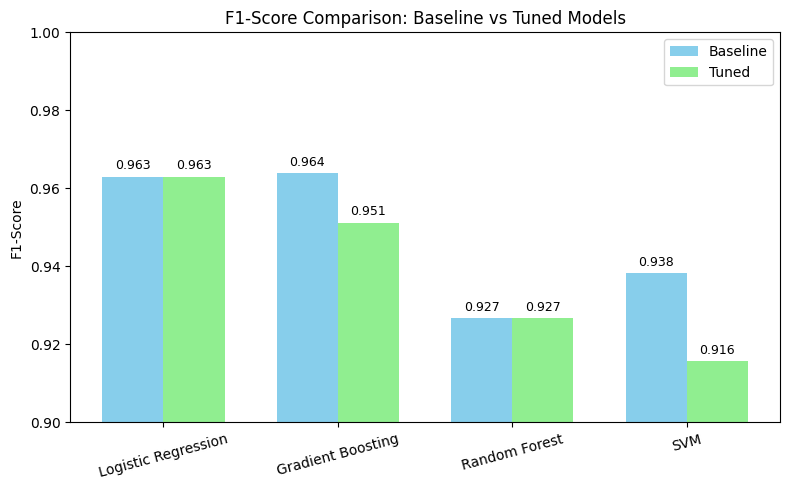

In [12]:
# -------------------------------
# Prepare the data
# -------------------------------
models = ['Logistic Regression', 'Gradient Boosting', 'Random Forest', 'SVM']
f1_baseline = [0.9630, 0.9639, 0.9268, 0.9383]  # Baseline F1-Scores
f1_tuned = [0.9630, 0.9512, 0.9268, 0.9157]     # Tuned F1-Scores

x = np.arange(len(models))  # positions
width = 0.35  # width of the bars

# -------------------------------
# Create the plot
# -------------------------------
fig, ax = plt.subplots(figsize=(8,5))
bars1 = ax.bar(x - width/2, f1_baseline, width, label='Baseline', color='skyblue')
bars2 = ax.bar(x + width/2, f1_tuned, width, label='Tuned', color='lightgreen')

# Labels and titles
ax.set_ylabel('F1-Score')
ax.set_title('F1-Score Comparison: Baseline vs Tuned Models')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=15)
ax.set_ylim(0.9, 1.0)
ax.legend()

# Annotate bars with values
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.3f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0,3),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


## 📈 Insights & Conclusion

- The model with the highest **F1-Score** is considered the best overall.  
- F1-Score balances Precision and Recall, making it ideal for imbalanced data.
- Next, we can visualize the **Confusion Matrix** and **ROC Curve** of the top-performing model.
---

# 📊 Model Evaluation Visualization

In this section, we will visualize the performance of the **best-performing model**  
using the **Confusion Matrix** and **ROC Curve**.  
These plots help us understand where the model performs well and where it makes mistakes.

---

### 🏆 Top 3 Models Based on F1-Score (Baseline)

After evaluating the baseline models, the **top 3 performing models** are:

| Rank | Model               | F1-Score |
|------|-------------------|----------|
| 1    | Gradient Boosting  | 0.9639   |
| 2    | Logistic Regression| 0.9630   |
| 3    | SVM                | 0.9383   |

**💡 Note:**  
- Hyperparameter tuning did **not significantly improve** performance for these models.  
- We can proceed with these top models for the **Deployment phase**.

 ---

## 🏆 Select the Best Model
We'll first identify the model with the highest **F1-Score** from the comparison table.

In [13]:
best_model_name = all_results['F1-Score'].idxmax()
print(f"Best Performing Model: {best_model_name}")


Best Performing Model: Gradient Boosting


## 📉 Confusion Matrix

The Confusion Matrix shows how many samples were correctly and incorrectly classified.  
It helps visualize the true positives, false positives, true negatives, and false negatives.


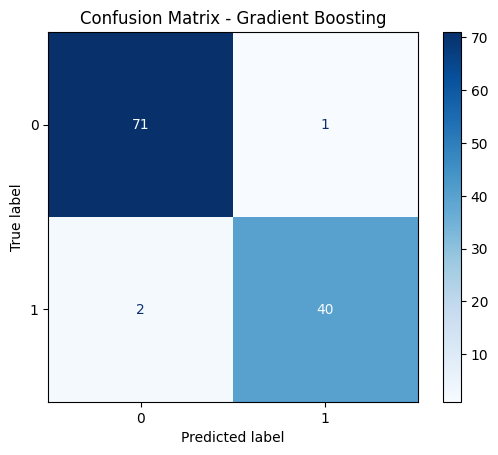

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

if best_model_name == "Logistic Regression":
    y_pred_best = y_pred_lr
elif best_model_name == "Random Forest":
    y_pred_best = y_pred_rf
elif best_model_name == "Gradient Boosting":
    y_pred_best = y_pred_gb
else:
    y_pred_best = y_pred_svm

cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')
plt.title(f"Confusion Matrix - {best_model_name}")
plt.show()

### **ROC Curve Analysis – Gradient Boosting**

The ROC curve above illustrates the performance of the Gradient Boosting model in distinguishing between positive (malignant) and negative (benign) cases.  
The curve rises sharply toward the top-left corner, indicating that the model achieves a **high True Positive Rate** with a **low False Positive Rate**.  
The **AUC score of 0.988** confirms that the model is highly effective in classifying cancer cases, showing excellent discrimination ability between the two classes.

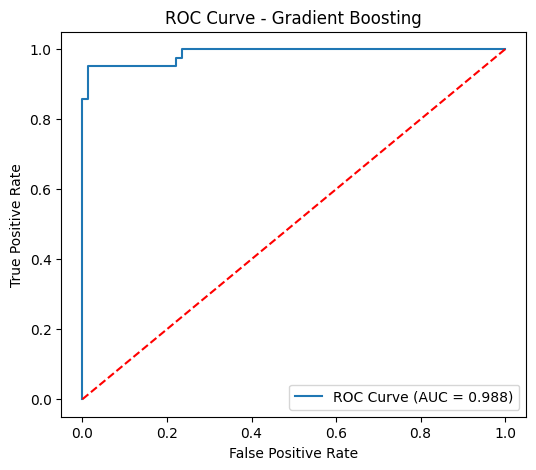

In [15]:
from sklearn.metrics import roc_curve, auc


y_pred_proba = None
if best_model_name == "Logistic Regression":
    y_pred_proba = lr_model.predict_proba(X_test)[:, 1]
elif best_model_name == "Random Forest":
    y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
elif best_model_name == "Gradient Boosting":
    y_pred_proba = gb_model.predict_proba(X_test)[:, 1]
else:
    y_pred_proba = svm_model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve - {best_model_name}')
plt.legend(loc='lower right')
plt.show()

## Model Saving

After evaluating all models, we will now save the best-performing model to a `.pkl` file using `joblib`.  
This allows us to easily reuse the trained model for predictions or deployment without retraining it again.

In [16]:
import joblib

# Save the best model
joblib.dump(best_model_name, "best_model.pkl")

print("Best model saved successfully as best_model.pkl")

Best model saved successfully as best_model.pkl
